In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [3]:
img = cv2.imread('/Users/divyansukumar/Desktop/Cracks2.jpeg')

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [5]:
blur = cv2.blur(gray,(3,3))

In [6]:
img_log = (np.log(blur+1)/(np.log(1+np.max(blur))))*255

In [7]:
img_log = np.array(img_log,dtype=np.uint8)

In [8]:
bilateral = cv2.bilateralFilter(img_log, 5, 75, 75)

In [33]:
edges = cv2.Canny(bilateral,100,200)


In [34]:
kernel = np.ones((5,5),np.uint8)
closing = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

In [35]:
orb = cv2.ORB_create(nfeatures=1500)

In [36]:
keypoints, descriptors = orb.detectAndCompute(closing, None)
featuredImg = cv2.drawKeypoints(closing, keypoints, None)

In [37]:
cv2.imwrite('/Users/divyansukumar/Desktop/Cracks.jpeg', featuredImg)

True

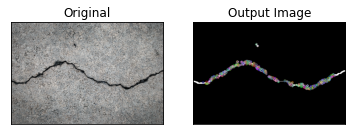

In [38]:
plt.subplot(121),plt.imshow(img)
plt.title('Original'),plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(featuredImg,cmap='gray')
plt.title('Output Image'),plt.xticks([]), plt.yticks([])
plt.show()